# read_html : HTML Tables to Dataframe!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize
import html5lib

In [2]:
tables_MN = pd.read_html('https://en.wikipedia.org/wiki/Minnesota')
len(tables_MN)

31

In [3]:
len(tables_MN)

31

In [4]:
# tables_MN_pres = pd.read_html('https://en.wikipedia.org/wiki/Minnesota', match='United States presidential election results for Minnesota')
# len(MN_pres_elections)

tables_MN_pres = pd.read_html('https://en.wikipedia.org/wiki/Minnesota', match='presidential')
tables_MN_pres


[    Year Republican         Democratic         Third party        
     Year        No.       %        No.       %         No.       %
 0   2020    1484065  45.28%    1717077  52.40%       76029   2.32%
 1   2016    1323232  44.93%    1367825  46.44%      254176   8.63%
 2   2012    1320225  44.96%    1546167  52.65%       70169   2.39%
 3   2008    1275409  43.82%    1573354  54.06%       61606   2.12%
 4   2004    1346695  47.61%    1445014  51.09%       36678   1.30%
 5   2000    1109659  45.50%    1168266  47.91%      160760   6.59%
 6   1996     766476  34.96%    1120438  51.10%      305726  13.94%
 7   1992     747841  31.85%    1020997  43.48%      579110  24.66%
 8   1988     962337  45.90%    1109471  52.91%       24982   1.19%
 9   1984    1032603  49.54%    1036364  49.72%       15482   0.74%
 10  1980     873241  42.56%     954174  46.50%      224538  10.94%
 11  1976     819395  42.02%    1070440  54.90%       60096   3.08%
 12  1972     898269  51.58%     802346  46.07% 

In [5]:
MN_pres_elections = tables_MN_pres[0]
MN_pres_elections

Year Republican         Democratic         Third party        
    Year        No.       %        No.       %         No.       %
0   2020    1484065  45.28%    1717077  52.40%       76029   2.32%
1   2016    1323232  44.93%    1367825  46.44%      254176   8.63%
2   2012    1320225  44.96%    1546167  52.65%       70169   2.39%
3   2008    1275409  43.82%    1573354  54.06%       61606   2.12%
4   2004    1346695  47.61%    1445014  51.09%       36678   1.30%
5   2000    1109659  45.50%    1168266  47.91%      160760   6.59%
6   1996     766476  34.96%    1120438  51.10%      305726  13.94%
7   1992     747841  31.85%    1020997  43.48%      579110  24.66%
8   1988     962337  45.90%    1109471  52.91%       24982   1.19%
9   1984    1032603  49.54%    1036364  49.72%       15482   0.74%
10  1980     873241  42.56%     954174  46.50%      224538  10.94%
11  1976     819395  42.02%    1070440  54.90%       60096   3.08%
12  1972     898269  51.58%     802346  46.07%       41037   2.36%
13  1968     658643  41.46%     857738  54.00%       72129   4.54%
14  1964     559624  36.00%     991117  63.76%        3721   0.24%
15  1960     757915  49.16%     779933  50.58%        4039   0.26%
16  1956     719302  53.68%     617525  46.08%        3178   0.24%
17  1952     763211  55.33%     608458  44.11%        7814   0.57%
18  1948     483617  39.89%     692966  57.16%       35643   2.94%
19  1944     527416  46.86%     589864  52.41%        8249   0.73%
20  1940     596274  47.66%     644196  51.49%       10718   0.86%
21  1936     350461  31.01%     698811  61.84%       80703   7.14%
22  1932     363959  36.29%     600806  59.91%       38078   3.80%
23  1928     560977  57.77%     396451  40.83%       13548   1.40%
24  1924     420759  51.18%      55913   6.80%      345474  42.02%
25  1920     519421  70.59%     142994  19.43%       73423   9.98%
26  1916     179544  46.35%     179152  46.25%       28668   7.40%
27  1912      64334  19.25%     106426  31.84%      163459  48.91%
28  1908     195843  59.11%     109401  33.02%       26060   7.87%
29  1904     216651  73.98%      55187  18.84%       21022   7.18%
30  1900     190461  60.21%     112901  35.69%       12949   4.09%
31  1896     193503  56.62%     139735  40.89%        8524   2.49%
32  1892     122823  45.96%     100920  37.76%       43495  16.28%
33  1888     142492  54.12%     104385  39.65%       16408   6.23%
34  1884     111685  58.78%      70065  36.87%        8267   4.35%
35  1880      93902  62.28%      53315  35.36%        3553   2.36%
36  1876      72955  58.80%      48587  39.16%        2533   2.04%
37  1872      55708  61.27%      35211  38.73%           0   0.00%
38  1868      43722  60.88%      28096  39.12%           0   0.00%
39  1864      25055  59.06%      17367  40.94%           0   0.00%
40  1860      22069  63.53%      11920  34.31%         748   2.15%

In [6]:
MN_pres_elections.columns

MultiIndex([(       'Year', 'Year'),
            ( 'Republican',  'No.'),
            ( 'Republican',    '%'),
            ( 'Democratic',  'No.'),
            ( 'Democratic',    '%'),
            ('Third party',  'No.'),
            ('Third party',    '%')],
           )

In [7]:
MN_pres_elections_clean = MN_pres_elections[[('Year', 'Year'),('Republican','%'),('Democratic','%')]]\
.replace({'%': ''}, regex=True).astype('float')

MN_pres_elections_clean.head()

,Year,Republican,Democratic
,Year,%,%
0,2020.0,45.28,52.40
1,2016.0,44.93,46.44
2,2012.0,44.96,52.65
3,2008.0,43.82,54.06
4,2004.0,47.61,51.09


In [8]:
MN_pres_elections_clean.columns

MultiIndex([(      'Year', 'Year'),
            ('Republican',    '%'),
            ('Democratic',    '%')],
           )

In [9]:
MN_pres_elections_clean.columns = ['Year','Republican','Democratic']

In [10]:
MN_pres_elections_clean.columns

Index(['Year', 'Republican', 'Democratic'], dtype='object')

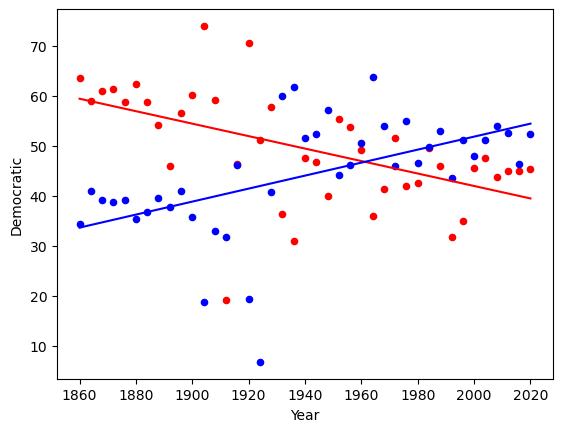

In [12]:
x = MN_pres_elections_clean['Year']
yr = MN_pres_elections_clean['Republican']
yd = MN_pres_elections_clean['Democratic']

ax1 = MN_pres_elections_clean.plot.scatter(x='Year',y='Republican',color='r')
ax2 = MN_pres_elections_clean.plot.scatter(x='Year',y='Democratic', color='b', ax=ax1)

#obtain m (slope) and b(intercept) of linear regression line

mr, br = np.polyfit(x, yr, 1)
md, bd = np.polyfit(x, yd, 1)

#add linear regression line to scatterplot 
plt.plot(x, mr*x+br, color='r')
plt.plot(x, md*x+bd, color='b')
